<a href="https://colab.research.google.com/github/Hazem-Ahmed-Abdelraouf/MyUni-Companion/blob/main/WMU102_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is the project for course WMU102**

## **Introduction**

Cerobrovascular accident (CVA) is the medical term for what is more commonly known as a stroke. This disease occurs when there is a loss of blood flow to the brain. Since there is no oxygen being supplied to that part of the brain, the brain cells start dying within minutes and this could lead to permanent brain damage, disability, or death.

Some of the major risk factors that can increase the risk of stroke are:

- Gender
- High blood pressure
- Diabetes
- Heart diseases
- Age
- Race and ethnicity
- Lifestyle

The use of machine learning in the medical field is a hot topic of research and its usage in a variety of different ways is being actively explored. One potential use of machine learning is in disease prediction. It is thus of interest to attempt to build a model capable of predicting if a stroke would occur based on the factors listed above. This is what we attempt to do in this project.

Ref: 
1. https://medlineplus.gov/stroke.html
2. https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113

Importing all required libraries for this project

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

## **Data Collection**

Dataset is taken from:

> fedesoriano. (2021, January). Stroke Prediction Dataset, Version 1. Retrieved December 29, 2021 from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/version/1.

The dataset contain 5,110 observations with 12 attributes. The dataset is used to predict probability of a patient get a stroke based on attributes provided such as gender, age, varioues diseases, and smoking status. 

The dataset contain 12 attributes which are:
1. id: unique identifier
2. gender: Male, Female, Other
3. age: age of the patient
4. hypertension: 0(doesn't have hypertension), 1(does have hypertension)
5. heart_disease: 0(doesn't have any heart disease), 1(does have a heart disease)
6. ever_married: No, Yes
7. work_type: children, Govt_job, Never_worked, Private, Self-employed
8. Residence_type: Rural, Urban
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index 
11. smoking_status: formerly smoked, never smoked, smoke, Unknown
12. stroke: 0(doesn't have stroke), 1(does have stroke)



In [123]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1-V6dmdaCZaaNdCJ734CAvuNtfqcGhjcg',)

In [124]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In this dataset we see that the factors recorded are gender, age, hypertension, heart disease, ever married, work type,residence type, average glucose level, body mass index (BMI), and smoking status.

## **Data manipulation (Data Preparation)**

In [125]:
df = df.dropna(how='any',axis=0)

In [126]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909,4909.000000,4909.000000,4909.000000,4909,4909,4909,4909.000000,4909.000000,4909,4909.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2897,NaN,NaN,NaN,3204,2811,2490,NaN,NaN,1852,NaN
mean,37064.313506,NaN,42.865374,0.091872,0.049501,NaN,NaN,NaN,105.305150,28.893237,NaN,0.042575
std,20995.098457,NaN,22.555115,0.288875,0.216934,NaN,NaN,NaN,44.424341,7.854067,NaN,0.201917
min,77.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,18605.000000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.070000,23.500000,NaN,0.000000
50%,37608.000000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.100000,NaN,0.000000
75%,55220.000000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.570000,33.100000,NaN,0.000000


In [127]:
print(df['smoking_status'].value_counts())


never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


Smoking status is an important factor. We have dropped the results where they were recorded as unknown lest they affect the results.

In [128]:
df = df[df.smoking_status != 'Unknown']
print(df['smoking_status'].value_counts())

never smoked       1852
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


We check the variable gender to see the possible vaues.

In [129]:
print(df['gender'].value_counts())

Female    2086
Male      1339
Other        1
Name: gender, dtype: int64


We found out that there is only one record with gender "other" so we decided to remove it.

In [130]:
df = df[df.gender != 'Other']

In [131]:
print(df['gender'].value_counts())

Female    2086
Male      1339
Name: gender, dtype: int64


The ID feature has no meaning to us so we decided to remove it.

In [132]:
df = df.drop('id', axis=1);

In [133]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [134]:
#getting rid of the outliers 

# mean + 3 * std
bmi_outlier_upper_boundary = df['bmi'].mean() + (3 * df['bmi'].std())
df = df[df.bmi < bmi_outlier_upper_boundary]
bmi_outlier_lower_boundary = df['bmi'].mean() - (3 * df['bmi'].std())
df = df[df.bmi > bmi_outlier_lower_boundary]

In [135]:
print(df['stroke'].value_counts())

0    3202
1     179
Name: stroke, dtype: int64


## **EDA and Data Visualization**

In this section, we generate some graphs of the data to get an idea of how the data looks.

In [136]:
age_groups = ['5-20','21-40','41-60','61-80','80+']
barWidth = 0.25
frequency1 = []
frequency2 = []
frequency1.append(df[df.age > 5][df.age <= 20][df.stroke == 1].value_counts().sum())
frequency2.append(df[df.age > 5][df.age <= 20][df.stroke == 0].value_counts().sum())

min = 21
max = 40
while max <=80 :
    frequency1.append(df[df.age >= min][df.age <= max][df.stroke == 1].value_counts().sum())
    frequency2.append(df[df.age >= min][df.age <= max][df.stroke == 0].value_counts().sum())
    min += 20
    max += 20
 
frequency1.append(df[df.age > 80][df.stroke == 1].value_counts().sum())
frequency2.append(df[df.age > 80][df.stroke == 0].value_counts().sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sy

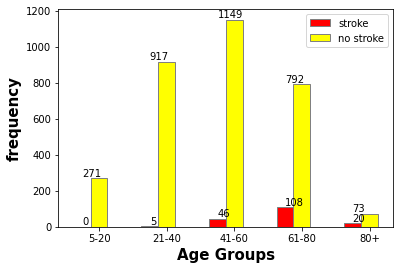

In [137]:
def addlabels(x,y,va = 'bottom'):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],va=va)

br1 = np.arange(len(frequency1))
br2 = [x + barWidth for x in br1]

addlabels(br1,frequency1)
addlabels(br2,frequency2)
# Make the plot
plt.bar(br1, frequency1, color = 'red', width = barWidth,
        edgecolor ='grey', label ='stroke')
plt.bar(br2, frequency2, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='no stroke')

plt.xlabel('Age Groups', fontweight ='bold', fontsize = 15)
plt.ylabel('frequency', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(frequency1))],age_groups)

plt.legend()
plt.show()

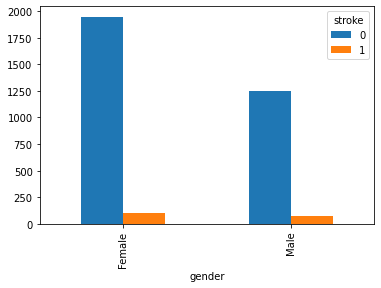

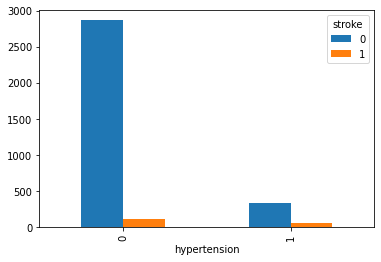

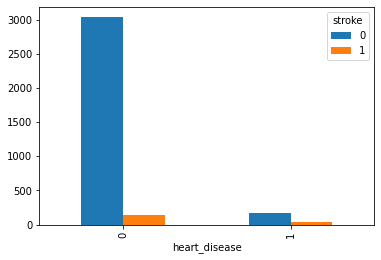

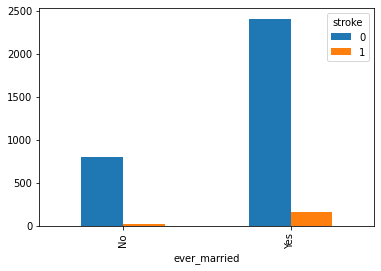

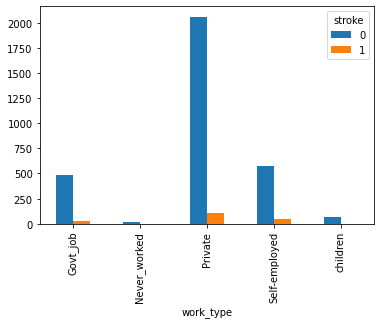

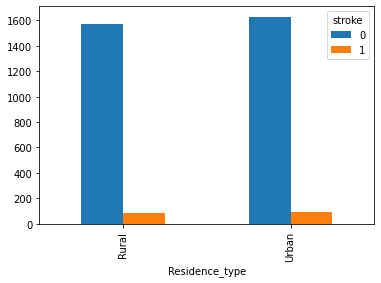

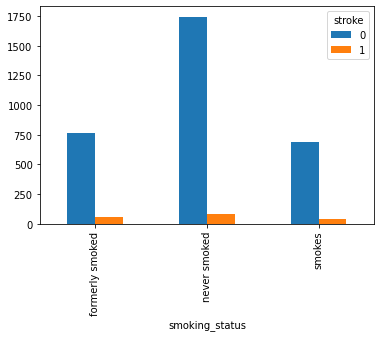

In [138]:
for col in df.columns:
    if col != "stroke" and col!= "id" and col != "age" and col != 'avg_glucose_level' and col != 'bmi':
        df.groupby([col, "stroke"])["stroke"].count().unstack().plot(kind="bar",)

In [139]:
glucose_levels = ['50-100','101-150','151-200','201-250','251+']

frequency3 = []
frequency4 = []
min = 50
max = 100
while max <=300 :
    frequency3.append(df[df.avg_glucose_level > min][df.avg_glucose_level <= max][df.stroke == 1].value_counts().sum())
    frequency4.append(df[df.avg_glucose_level > min][df.avg_glucose_level <= max][df.stroke == 0].value_counts().sum())
    min += 50
    max += 50
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: 

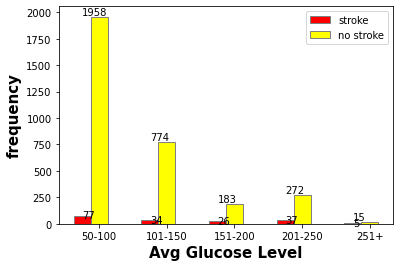

In [140]:
br3 = np.arange(len(frequency3))
br4 = [x + barWidth for x in br3]

addlabels(br3,frequency3, 'center')
addlabels(br4,frequency4)
# Make the plot
plt.bar(br3, frequency3, color = 'red', width = barWidth,
        edgecolor ='grey', label ='stroke')
plt.bar(br4, frequency4, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='no stroke')

plt.xlabel('Avg Glucose Level', fontweight ='bold', fontsize = 15)
plt.ylabel('frequency', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(frequency3))],glucose_levels)

plt.legend()
plt.show()

## **Machine learning**

We build models using three different methods. These are:
- Random forest classifier
- Logistic regression
- K-Nearest Neighbours (KNN)

### **One Hot Encoding**

Before creating machine learning models, it is important to make sure that the dataset is suitable to be process. One of the thing to be look at is how to manage categorical data. In this dataset, there are:
1. gender
2. ever_marrried
3. work_type
4. Residence_type
5. smoking_status

We will applying one hot encoding to converted data into binary value of 0 or 1. In one hot encoding, we will convert each categorical value in each column into new catergorical column. For example, male in gender column will become a new column with name male, value consists of 0 or 1. We will use pandas get_dummies function to a dataframe with the column passed in returned as dummy variables. After concantenate original dataframe with one hot encoding dataframe, we will drop the original column with categorical data. 



In [141]:
def onehot_encode(original_df, feature):
    feature_encode = pd.get_dummies(original_df[[feature]])
    new_df = pd.concat([original_df, feature_encode], axis=1)
    new_df = new_df.drop([feature], axis=1)
    return(new_df)

In [142]:
feature_to_encode = []
for col in df.columns:
  a = df[col].dtypes
  if a == object:
    feature_to_encode.append(col)

print(feature_to_encode)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [143]:
mod_df = df
for feature in feature_to_encode:
  mod_df = onehot_encode(mod_df, feature)

In [144]:
mod_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,82.0,1,0,71.97,28.3,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0
5102,57.0,0,0,77.93,21.7,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0


### **Pipeline**

The dataset that we used in this model contain unbalanced data in which for y_train, our value for 0 (doesn't have stroke) and 1 (does have stroke) is too much different in value, 2,562 and 143 respectively. To avoid bias in our model, we will apply undersampling and oversampling method simultaneously with the pipeline to adjust our dataframe. 

During the implementation, we will use RandomOverSampler and RandomUnderSampler. RandomOverSampler is use to duplicates rows of the majority class. On the other hand, RandomUnderSampler is use to deletes rows of the majority class. To be noted that this method will only be applied to traing data. 

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X = mod_df.drop('stroke', axis=1)
y = mod_df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify = y, random_state=101)

In [147]:
y_train.value_counts()

0    2561
1     143
Name: stroke, dtype: int64

In [148]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [149]:
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [150]:
from imblearn.pipeline import Pipeline

In [151]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [152]:
X_smote, y_smote = pipeline.fit_resample(X_train, y_train)

Our new data for y_train or in this case y_smote has better balanced in value between 0 and 1.

In [153]:
y_smote.value_counts()

0    512
1    256
Name: stroke, dtype: int64

### **Random Forest Classifier**

One of the machine learning algorithm that will be used is **Random Forest Classifier**. Random forest is a supervised learning algorithm. Which mean that we used labelled dataset for training the model. Random forest work by creating decision tree on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.

Random forest is technically done in ensemble method (based on divide-and-conquer approach). Random forest works in four steps:
1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

Random forest has a few advantages against other algorithm which are:
* It is considered as a highly accurate and robust method
* Does not suffer from the overfitting problem. 
* Random forest can handle missing value.



In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_smote, y_smote)

RandomForestClassifier()

In [156]:
y_pred_rfc = rfc.predict(X_test)

In [157]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.8700147710487445


In [158]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
print("Confusion matrix:")
print(confusion_matrix)

Confusion matrix:
[[577  64]
 [ 24  12]]


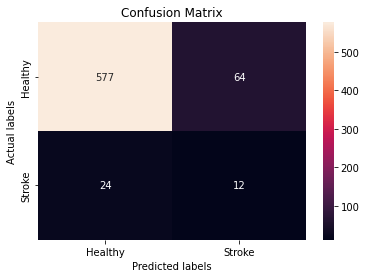

In [159]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Healthy', 'Stroke']); ax.yaxis.set_ticklabels(['Healthy', 'Stroke']);

In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       641
           1       0.16      0.33      0.21        36

    accuracy                           0.87       677
   macro avg       0.56      0.62      0.57       677
weighted avg       0.92      0.87      0.89       677



### **Logistic Regression**

Logistic regression is an algorithm used for binary dependent variables. In our case it is suitable to be used as the dependent variable 'occurence of stroke' is a binary variable with values 'healthy' and 'stroke'. For this model, ideally the independent variables should be independent or close to independent and large sample sizes should be available.

Ref: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


In [161]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_smote, y_smote)
y_pred_lr = clf.predict(X_test)

score_logi_reg = clf.score(X_test, y_test)

cm = metrics.confusion_matrix(y_test, y_pred_lr)

print("Accuracy =",score_logi_reg)

Accuracy = 0.8005908419497785


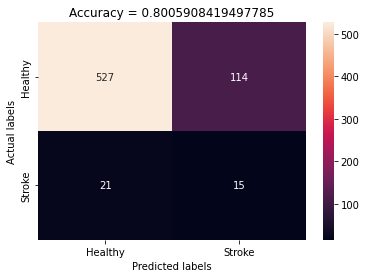

In [162]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Accuracy = '+str(score_logi_reg)); 
ax.xaxis.set_ticklabels(['Healthy', 'Stroke']); ax.yaxis.set_ticklabels(['Healthy', 'Stroke']);

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89       641
           1       0.12      0.42      0.18        36

    accuracy                           0.80       677
   macro avg       0.54      0.62      0.53       677
weighted avg       0.92      0.80      0.85       677



### **K-Nearest Neighbors**

ref

A statistical algorithm that is used in non-parametric classification. It is supervised machine learning algorithm that can be used in classification and regression in, but in our case study here we are using it in classification only. 
The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

**Advantages of using KNN:**


1.   The algorithm is simple and easy to implement.

2.   There’s no need to build a model, tune several parameters, or make additional assumptions.
3. The algorithm is versatile. It can be used for classification and  regression

**Disdvantages:**

1. The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

Ref:
* https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
* https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
knn = KNeighborsClassifier(n_neighbors = 4) 

In [166]:
knn.fit(X_smote,y_smote)

KNeighborsClassifier(n_neighbors=4)

In [167]:
knnPredictions = knn.predict(X_test)

In [168]:
metrics.accuracy_score(y_test,knnPredictions)

0.8257016248153619

In [169]:
knn_cm = metrics.confusion_matrix(y_test,knnPredictions)
print("Knn model confusion matrix:",knn_cm, sep="\n")

Knn model confusion matrix:
[[549  92]
 [ 26  10]]


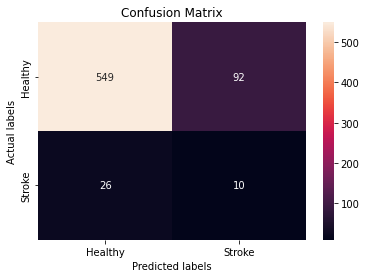

In [170]:
ax = plt.subplot()
sns.heatmap(knn_cm,annot=True,fmt='g',ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Healthy', 'Stroke'])
ax.yaxis.set_ticklabels(['Healthy', 'Stroke']);

In [171]:
print(classification_report(y_test,knnPredictions))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       641
           1       0.10      0.28      0.14        36

    accuracy                           0.83       677
   macro avg       0.53      0.57      0.52       677
weighted avg       0.91      0.83      0.86       677



### **ANN**

In [172]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [173]:
## turning the data to numpy arrays to ease the proccessing
X_smote=X_smote.values
y_smote =y_smote.values
X_test = X_test.values
y_test = y_test.values 
y=df['stroke'].values###dependent features
##### Creating Tensors
X_train=torch.FloatTensor(X_smote)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_smote)
y_test=torch.LongTensor(y_test)


In [174]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=19,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [175]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [176]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=19, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [177]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [178]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 1.6348203420639038
Epoch number: 11 and the loss : 0.9163062572479248
Epoch number: 21 and the loss : 0.7446753978729248
Epoch number: 31 and the loss : 0.6377200484275818
Epoch number: 41 and the loss : 0.5962364077568054
Epoch number: 51 and the loss : 0.5477170944213867
Epoch number: 61 and the loss : 0.513714075088501
Epoch number: 71 and the loss : 0.5074699521064758
Epoch number: 81 and the loss : 0.4978126287460327
Epoch number: 91 and the loss : 0.49090632796287537
Epoch number: 101 and the loss : 0.48467350006103516
Epoch number: 111 and the loss : 0.4789621829986572
Epoch number: 121 and the loss : 0.4815589189529419
Epoch number: 131 and the loss : 0.4694661796092987
Epoch number: 141 and the loss : 0.4662446081638336
Epoch number: 151 and the loss : 0.4604755938053131
Epoch number: 161 and the loss : 0.45698031783103943
Epoch number: 171 and the loss : 0.4578196704387665
Epoch number: 181 and the loss : 0.46376004815101624
Epoch number: 191 an

In [179]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

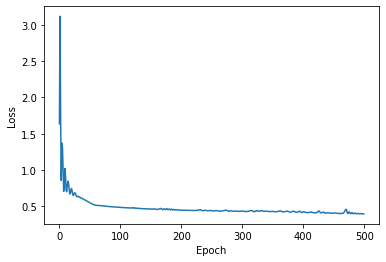

In [180]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [181]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item(),end=',')

1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,

In [182]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[522, 119],
       [ 17,  19]])

Text(69.0, 0.5, 'Predicted Values')

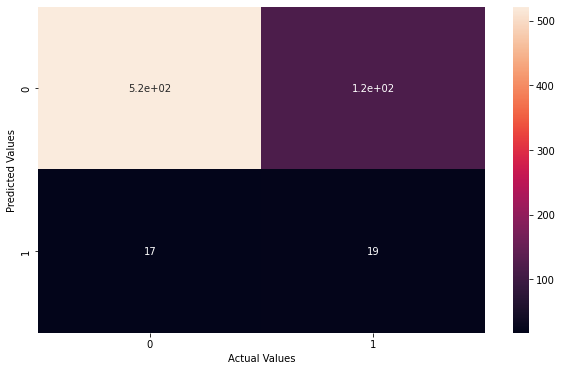

In [183]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [184]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7991137370753324

In [185]:
batch_size = 1
x = torch.randn(batch_size, 19, requires_grad=True)
x

tensor([[ 0.4037, -0.9125,  1.7266,  0.3274, -2.2726,  0.0391,  1.2946, -1.0904,
          0.5907,  0.5396,  1.7308,  1.3952, -0.7016,  0.9470,  0.0101, -0.7762,
         -2.1411, -0.5271,  0.8400]], requires_grad=True)

In [186]:
torch_out = model(x)

In [187]:

# Export the model
torch.onnx.export(model,               # model being run
                  x,                         # model input (or a tuple for multiple inputs)
                  "rf_cva.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=10,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                  dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                'output' : {0 : 'batch_size'}})

## **Discussion**

From the results above, the best model was obtained using random forest classifier. It has an accuracy of 0.87 and f1 scores of 0.92 for 'healthy' and 0.20 for 'stroke'. This is better than the accuracies and f1-scores obtained for logistic regression and KNN.

We note however that the results are altogether unsatisfactory. Looking at the confusion matrix for the models, we see that for the random forest method, only 11/36 = 30.6% of the actual stroke was predicted by the model. Furthermore, 73 healthy patients were predicted to have a stroke by this model. The logistic regression and KNN models were marginally better in this regard with 41.7% and 33.3% of the actual stroke being predicted in these models respectively, however these models predicted large numbers (110 and 92 respectively) of healthy people having stroke leading to lower f1-scores and lower overall accuracies.

The failure of our prediction model may be attributed to the unbalanced data used to make it. Our dataset has far more healthy cases than unhealthy cases. This lead to the low f1 score for 'stroke'. While this was improved somewhat by undersampling for the healthy cases and oversampling for the stroke cases, the problems caused by the unbalanced dataset cannot be fully overcome. Furthermore, the neccesity of eliminating the smoking status column and certain cases with incomplete data further reduced the accuracy of the predictive models. The amount of data left was insufficient to from an accurate model.

To address these problems, more data is required. Undersampling can then be done to produce a balanced dataset. The increased data would increase the accuracy of the learning models.

We also note that we have not factored in the possibility that the 'healthy' cases may then later develope 'strokes'. How to factor this in is unclear at this moment. This possibility must be considered not only for this project, but for all machine learning based implementations in the medical field.



## **Conclusion**

We have used machine learning methods (random forest classifier, logistic regression, and K-nearest neighbours (KNN)) to model the occurence of stroke with a selected dataset. Undersampling and oversampling was used to address the unbalanced data however this was unsuccessful. The best model was produced using the random forest classifier method with an accuracy of 0.87 and f1 scores of 0.92 for 'healthy' and 0.20 for 'stroke'. This model however was unsatisfactory due to the unbalanced data. To address this, more data must be collected.

## Demo